# Model REST API

The Model REST API provides an interface for transforming models in various ways. Here are some examples. The model REST API documentation is available at [http://34.230.33.149:8771/docs#/](http://34.230.33.149:8771/docs#/)

## Setup

We will need `requests` to send requests to the model api.

In [1]:
import requests
from mira.metamodel import Concept, ControlledConversion, NaturalConversion, TemplateModel

# rest_url = "http://127.0.0.1:8000"  # Local service
rest_url = "http://34.230.33.149:8771"

# Example TemplateModel
infected = Concept(name="infected population", identifiers={"ido": "0000511"})
susceptible = Concept(name="susceptible population", identifiers={"ido": "0000514"})
immune = Concept(name="immune population", identifiers={"ido": "0000592"})
controlled_conversion = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=infected,
)
natural_conversion = NaturalConversion(subject=infected, outcome=immune)
sir_template_model = TemplateModel(templates=[controlled_conversion, natural_conversion])
sir_template_model_dict = sir_template_model.dict()
print(sir_template_model.json())

{"templates": [{"rate_law": null, "type": "ControlledConversion", "controller": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "subject": {"name": "susceptible population", "identifiers": {"ido": "0000514"}, "context": {}}, "outcome": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "provenance": []}, {"rate_law": null, "type": "NaturalConversion", "subject": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "outcome": {"name": "immune population", "identifiers": {"ido": "0000592"}, "context": {}}, "provenance": []}], "parameters": {}, "initials": {}}


## PetriNet

The `/api/to_petrinet` endpoint returns a PetriNet model based on the `TemplateModel` provided:

In [2]:
res = requests.post(rest_url + "/api/to_petrinet", json=sir_template_model_dict)
print(res.json())

{'S': [{'sname': 'susceptible population', 'mira_ids': "[('identity', 'ido:0000514')]", 'mira_context': '[]'}, {'sname': 'infected population', 'mira_ids': "[('identity', 'ido:0000511')]", 'mira_context': '[]'}, {'sname': 'immune population', 'mira_ids': "[('identity', 'ido:0000592')]", 'mira_context': '[]'}], 'T': [{'tname': 't1', 'template_type': 'ControlledConversion', 'parameter_name': "(('susceptible population', ('identity', 'ido:0000514')), ('infected population', ('identity', 'ido:0000511')), ('infected population', ('identity', 'ido:0000511')), 'ControlledConversion', 'rate')", 'parameter_value': None}, {'tname': 't2', 'template_type': 'NaturalConversion', 'parameter_name': "(('infected population', ('identity', 'ido:0000511')), ('immune population', ('identity', 'ido:0000592')), 'NaturalConversion', 'rate')", 'parameter_value': None}], 'I': [{'is': 2, 'it': 1}, {'is': 1, 'it': 1}, {'is': 2, 'it': 2}], 'O': [{'os': 2, 'ot': 1}, {'os': 2, 'ot': 1}, {'os': 3, 'ot': 2}]}


## Model Stratification

The `/api/stratify` endpoint can stratify a model. In this example, the stratification is along two cities, effectively creating a two-city SIR model from the original SIR model:

In [3]:
res = requests.post(rest_url + "/api/stratify", json={"template_model": sir_template_model_dict, "key": "city", "strata": ["Boston", "New York City"]})
print(res.json())

{'templates': [{'rate_law': None, 'type': 'ControlledConversion', 'controller': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'Boston'}}, 'subject': {'name': 'susceptible population', 'identifiers': {'ido': '0000514'}, 'context': {'city': 'Boston'}}, 'outcome': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'Boston'}}, 'provenance': []}, {'rate_law': None, 'type': 'NaturalConversion', 'subject': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'Boston'}}, 'outcome': {'name': 'immune population', 'identifiers': {'ido': '0000592'}, 'context': {'city': 'Boston'}}, 'provenance': []}, {'rate_law': None, 'type': 'ControlledConversion', 'controller': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'New York City'}}, 'subject': {'name': 'susceptible population', 'identifiers': {'ido': '0000514'}, 'context': {'city': 'New York City'}}, 'ou

## Graphviz dot File

The `/api/viz/to_dot_file` endpoint takes a `TemplateModel` and returns a graphviz dotfile of the provided model:

In [4]:
res = requests.post(rest_url + "/api/viz/to_dot_file", json=sir_template_model_dict)
print(res.text)

strict digraph "" {
	graph [bb="0,0,178,313"];
	node [label="\N"];
	"('susceptible population', ('identity', 'ido:0000514'))"	[height=0.65278,
		label="{susceptible population | {identity | ido:0000514}}",
		pos="89,289.5",
		rects="-1.4211e-14,289.5,178,312.5 -1.4211e-14,266.5,72,289.5 72,266.5,178,289.5",
		shape=record,
		width=2.4722];
	T0	[color=blue,
		fillcolor=blue,
		fixedsize=true,
		height=0.19444,
		label="",
		pos="89,223",
		shape=square,
		style=filled,
		width=0.19444];
	"('susceptible population', ('identity', 'ido:0000514'))" -> T0	[pos="e,89,230.05 89,266.3 89,257.68 89,248 89,240.08"];
	"('infected population', ('identity', 'ido:0000511'))"	[height=0.65278,
		label="{infected population | {identity | ido:0000511}}",
		pos="89,156.5",
		rects="-1.4211e-14,156.5,178,179.5 -1.4211e-14,133.5,72,156.5 72,133.5,178,156.5",
		shape=record,
		width=2.4722];
	T0 -> "('infected population', ('identity', 'ido:0000511'))"	[pos="e,82.56,179.55 84.757,215.58 83.08,209.38 82.245,1

## Graph image

The `/api/viz/to_image` endpoint returns an image of the model as a graph structure.

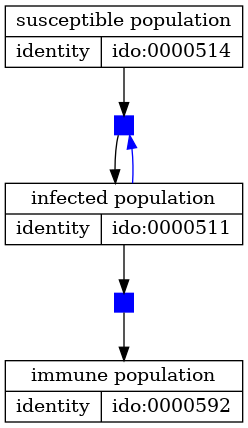

In [5]:
res = requests.post(rest_url + "/api/viz/to_image", json=sir_template_model_dict)
with open("./graph.png", "wb") as fio:
    fio.write(res.content)

from IPython.display import Image
Image(filename="./graph.png")